## Assignment 6
## Multilayer perceptron. Backpropagation.

The goal of this task is to train a multilayer perceptron for classification using backpropagation.

The model is defined in the following way.

$z_1 = W_1x + b_1,$

$h = \tanh(z_1),$

$z_2 = W_2h + b_2,$

$y = \mathrm{softmax}(z_2),$

$L = -\sum_{i} t\log y.$

Where $x$ is the input vector. The cross-entropy loss function is used, where $t$ are targets represented as one-hot vectors. And you also need to add $L_2$ regularization on $W_1$ and $W_2$.

The task is to classify hand-written digits from MNIST dataset, there are 10 classes in total, each corresponds to a different digit. The task is to train the classifier using stochastic gradient descent (SGD). So, you need to compute gradients for each parameter of the model, i.e. $W_1$, $b_1$, $W_2$, $b_2$.

The code below loads the dataset, there are 1797 samples in total. You need to split the dataset into two parts, 80 percent of the samples for the training set and the remaining 20 percent for the test set. Make sure that both contain all kinds of digits. Each of the samples in a greyscale image 8x8 which is represented as a 64-dimensional vector when given as an input to the neural network classifier. Use dimension 50 for the hidden layer $h$ in the beginning. You are welcome to play with this parameter after you finish the implementation to see how it affects the results.

Plot the value of the loss function after each epoch and also plot the classification accuracy for the training and the test set on the same plot.

**Bonus.** 
Besides cross-entropy loss, you are welcome to try multi-class hinge loss described on the following web-page and compare it to cross-entropy loss in terms of accuracy. Try to avoid using for loops in your implementation so that your code is fully vectorized.
http://cs231n.github.io/linear-classify/


(1437, 2) (360, 2) (1797, 2)


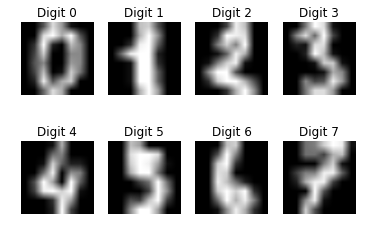

In [183]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from scipy.misc import derivative

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear')
    plt.title('Digit %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
dataset = np.array(list(zip(data, digits.target)))
np.random.shuffle(dataset)
train_index = int(n_samples * 0.8)

train = dataset[:train_index]
test = dataset[train_index:]


print(train.shape, test.shape, dataset.shape)

In [184]:
def softmax(x):
    if x.ndim == 1:
        return np.exp(x) / np.sum(np.exp(x))
    
    _x = np.zeros(x.shape)
    _sum = np.sum(np.exp(x), axis=1)
    for i in range(x.shape[0]):
        _x[i] = np.exp(x[i]) / _sum[i]
    return _x

def g(x):
    return np.tanh(x)

def g_grad(x): 
    return 1 - np.tanh(x) ** 2
  
def identifier(y, size):
    _cat = np.zeros(size)
    _cat[y] = 1
    return _cat

def to_categorical(y, size=10):
    cat = []
    for _y in y:
        _cat = identifier(_y, size)
        cat.append(_cat)
        
    return np.array(cat)

def collect_weights(w1, b1, w2, b2):
    theta = []
    theta.append([w1, b1])
    theta.append([w2, b2])

    return np.array(theta)

def accuracy(y, predicted):
    _y_m = np.argmax(y)
    _p_m = np.argmax(predicted)
    _v = 1
    if _y_m != _p_m:
        _v = 0

    return _v

In [185]:
def backprop(x, y, theta):
    W1 = theta[0][0]
    b1 = theta[0][1]
    
    W2 = theta[1][0]
    b2 = theta[1][1]
    
    z1 = W1.dot(x.T) + b1
    h1 = g(z1)
    z2 = W2.dot(h1) + b2
    f = softmax(z2)
    L = - y.dot(f)
    
    dLz2 = f - y  # vector
    
    dW2 = np.outer(dLz2, h1)  # matrix
    db2 = dLz2 # vector
    
    dLh1 = dLz2.dot(W2) # vector
    dLz1 = dLh1 * g_grad(z1) # vector
    dLW1 = np.outer(dLz1, x)  # matrix
    dLb1 = dLz1  # vector
    
    return dW2, db2, dLW1, dLb1

In [186]:
def network(x, theta, verbose=True):
    W1 = theta[0][0]
    b1 = theta[0][1]
    
    W2 = theta[1][0]
    b2 = theta[1][1]
    
    z1 = W1.dot(x) + b1
    h = g(z1)
    z2 = W2.dot(z1) + b2
    f = softmax(z2)
    
    return f

def loss(y, _predicted):
    _sum = np.log(_predicted.dot(y))
    return -_sum # normalize

Epoch: 0, loss: 2.27738, acc: 0.2004
Epoch: 1, loss: 1.65730, acc: 0.5122
Epoch: 2, loss: 0.93558, acc: 0.6952
Epoch: 3, loss: 0.52198, acc: 0.8309
Epoch: 4, loss: 0.32598, acc: 0.9040
Epoch: 5, loss: 0.23469, acc: 0.9262
Epoch: 6, loss: 0.19213, acc: 0.9360
Epoch: 7, loss: 0.17680, acc: 0.9402
Epoch: 8, loss: 0.15713, acc: 0.9478
Epoch: 9, loss: 0.14662, acc: 0.9541
Epoch: 10, loss: 0.13982, acc: 0.9548
Epoch: 11, loss: 0.13363, acc: 0.9576
Epoch: 12, loss: 0.12794, acc: 0.9596
Epoch: 13, loss: 0.12615, acc: 0.9638
Epoch: 14, loss: 0.12397, acc: 0.9617
Epoch: 15, loss: 0.12192, acc: 0.9610
Epoch: 16, loss: 0.12426, acc: 0.9694
Epoch: 17, loss: 0.10936, acc: 0.9729
Epoch: 18, loss: 0.11350, acc: 0.9743
Epoch: 19, loss: 0.11130, acc: 0.9715


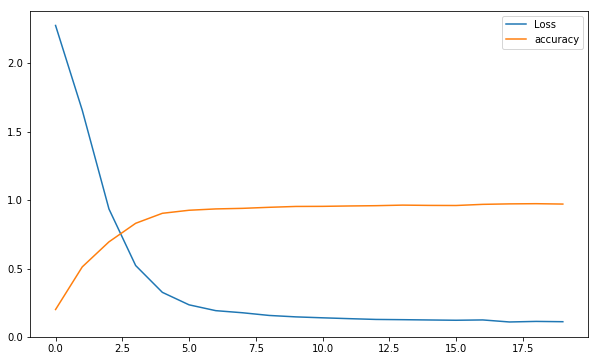

In [187]:
x_train = np.stack(train[:, 0])
y_train = np.stack(train[:, 1])
y_train = to_categorical(y_train)

x_test = np.stack(test[:, 0])
y_test = np.stack(test[:, 1])
y_test = to_categorical(y_test)

W1 = np.random.random((20, x_train.shape[1])) * 1e-3
b1 = np.random.random(20) * 1e-3

W2 = np.random.random((10, 20)) * 1e-3
b2 = np.random.random(10) * 1e-3

theta = collect_weights(W1, b1, W2, b2)

Epoch = 20
learning_rate = 1e-3
losses = []
acc = []

train_set = list(zip(x_train, y_train))

for i in range(Epoch):
    _loss = []
    _acc = []
    np.random.shuffle(train_set)
    for x, y in train_set:
        _predicted = network(x, theta)
        
        _loss_value = loss(y, _predicted)
        _loss.append(_loss_value)
        
        _acc_value = accuracy(y, _predicted)
        _acc.append(_acc_value)
        
        w2_grad, b2_grad, w1_grad, b1_grad = backprop(x, y, theta)
        
        W1 = W1 - learning_rate * w1_grad
        b1 = b1 - learning_rate * b1_grad
        W2 = W2 - learning_rate * w2_grad
        b2 = b2 - learning_rate * b2_grad
        theta = collect_weights(W1, b1, W2, b2)
    
    _acc = np.sum(_acc) / len(_acc)
    acc.append(_acc)
    losses.append(np.average(_loss))  
    print('Epoch: {}, loss: {:.5f}, acc: {:.4f}'.format(i, np.average(_loss), _acc))

plt.figure(figsize=(10, 6))
plt.plot(losses, label='Loss')
plt.plot(acc, label='accuracy')
plt.legend()

In [190]:
test_set = zip(x_test, y_test)
test_acc = []
for x_t, y_t in test_set:
    _predicted = network(x_t, theta)

    _acc_value = accuracy(y_t, _predicted)
    test_acc.append(_acc_value)
    
test_acc = np.sum(test_acc) / len(test_acc)
print('Test Accuracy: {:.2f}%'.format(test_acc))

Test Accuracy: 0.94%
